In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [90]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [91]:
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [92]:
df.shape

(569, 30)

In [93]:
from sklearn.cluster import KMeans

In [94]:
cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
   clusters=KMeans(n_clusters=num_clusters)
   clusters.fit(df)
   cluster_errors.append(clusters.inertia_)

In [95]:
clusters_df=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2.566772e+08
1,2,7.794310e+07
2,3,4.733661e+07
3,4,2.922654e+07
4,5,2.053517e+07
5,6,1.664489e+07
6,7,1.324964e+07
7,8,1.118079e+07
8,9,9.447295e+06


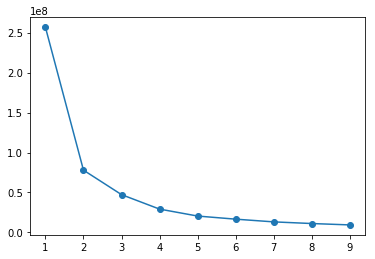

In [96]:
plt.plot(clusters_df.num_clusters,clusters_df.cluster_errors,marker='o')

In [97]:

kmeans=KMeans(n_clusters=2).fit(df)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [98]:
centroids=kmeans.cluster_centers_
print(centroids)

[[1.25562991e+01 1.85703653e+01 8.11234703e+01 4.96061872e+02
  9.48844977e-02 9.10998174e-02 6.24377642e-02 3.34325434e-02
  1.78057991e-01 6.34540183e-02 3.04190868e-01 1.21515320e+00
  2.15288059e+00 2.37852922e+01 7.17326256e-03 2.34746895e-02
  2.87455128e-02 1.06363242e-02 2.06135799e-02 3.74750297e-03
  1.40439018e+01 2.47095434e+01 9.19375114e+01 6.19647945e+02
  1.29959110e-01 2.23311758e-01 2.19214947e-01 9.13298425e-02
  2.83553653e-01 8.32819406e-02]
 [1.93799237e+01 2.16945802e+01 1.28231298e+02 1.18592977e+03
  1.01294580e-01 1.48612977e-01 1.76939466e-01 1.00698779e-01
  1.91539695e-01 6.06029008e-02 7.42803817e-01 1.22253817e+00
  5.25058015e+00 9.56781679e+01 6.59868702e-03 3.21766947e-02
  4.24197710e-02 1.56739847e-02 2.03039695e-02 3.95338931e-03
  2.37094656e+01 2.89126718e+01 1.58496183e+02 1.75302290e+03
  1.40424733e-01 3.57757710e-01 4.49306107e-01 1.92431069e-01
  3.11881679e-01 8.61654962e-02]]


In [99]:
kmeans.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [100]:
k_df=df
k_df["outcome"]=kmeans.labels_

In [101]:
k_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [102]:
x=k_df.drop("outcome",axis=1)
y=k_df["outcome"]

In [103]:
x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [152]:
y.value_counts()

0    438
1    131
Name: outcome, dtype: int64

In [118]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                        test_size=0.3, random_state=0) 

In [119]:
#scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [120]:
#Apply PCA
from sklearn.decomposition import PCA

#PCA for all the features
pca = PCA()  
x_train = pca.fit_transform(x_train)  
x_test = pca.transform(x_test)

In [121]:
pca.explained_variance_ratio_  

array([4.36893153e-01, 1.94151626e-01, 9.66154484e-02, 6.71661075e-02,
       5.49883033e-02, 4.01225718e-02, 2.18306816e-02, 1.48922601e-02,
       1.37410827e-02, 1.10137130e-02, 1.04826288e-02, 9.16214247e-03,
       7.66306051e-03, 5.14226331e-03, 3.19635178e-03, 2.51968451e-03,
       1.92415148e-03, 1.65844223e-03, 1.49026749e-03, 1.06777316e-03,
       1.01725216e-03, 8.48954816e-04, 7.43492725e-04, 5.81295611e-04,
       5.44222785e-04, 2.53545469e-04, 2.14385701e-04, 4.62967124e-05,
       2.51158320e-05, 3.72534805e-06])

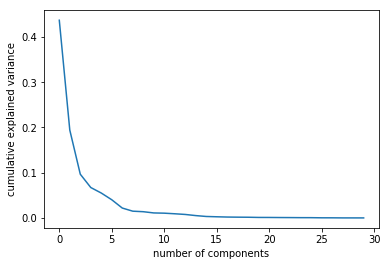

In [122]:
#Explained variance
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [123]:
#Apply PCA
from sklearn.decomposition import PCA

#PCA for all the features
pca = PCA(n_components=6)  
x_train = pca.fit_transform(x_train)  
x_test = pca.transform(x_test)

In [124]:
pca.explained_variance_ratio_  

array([0.43689315, 0.19415163, 0.09661545, 0.06716611, 0.0549883 ,
       0.04012257])

In [125]:
x_train

array([[-2.17650596,  1.25618056, -0.79259801, -0.78858712,  0.17034054,
        -0.17007413],
       [-3.55565312,  0.8699926 ,  0.24033723,  0.42062215, -0.6031937 ,
        -1.81157335],
       [-2.41910268, -0.0242749 , -0.7788098 , -0.03629268, -0.0811805 ,
         0.86698096],
       ...,
       [-3.2162363 ,  0.53981181,  0.46743474,  0.14364573, -0.7532025 ,
        -1.13843751],
       [-5.72095067, -0.5719622 ,  3.84995071,  2.60089458, -1.00519023,
         1.89363702],
       [-1.0632595 ,  1.39453316,  1.17698027,  3.56078276,  1.24909982,
        -1.52462307]])

In [126]:
#Train and test the model
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

C:\Users\RAMASAMY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [127]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)) )

[[134   0]
 [ 28   9]]
Accuracy : 0.8362573099415205


In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
lg = LogisticRegression(random_state=0)
lg.fit(x_train, y_train)
y_pred_log =lg.predict(x_test) 

C:\Users\RAMASAMY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [131]:

cm = confusion_matrix(y_test, y_pred_log)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(y_test, y_pred_log)) )

[[130   4]
 [  2  35]]
Accuracy : 0.9649122807017544


In [181]:
from sklearn.neighbors import KNeighborsClassifier

In [182]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [188]:

cm = confusion_matrix(y_test, y_pred_knn)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(y_test, y_pred_knn)) )

[[133   1]
 [  5  32]]
Accuracy : 0.9649122807017544


In [158]:
df1=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [159]:
df1["outcome"]=cancer.target

In [160]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [161]:
x1=df1.drop("outcome",axis=1)
y1=df1["outcome"]

In [162]:
y1.shape

(569,)

In [163]:
y1.value_counts()

1    357
0    212
Name: outcome, dtype: int64

In [164]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, 
                                        test_size=0.3, random_state=0) 

In [165]:
#scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
x1_train = sc.fit_transform(x1_train)  
x1_test = sc.transform(x1_test)

In [166]:
#Apply PCA
from sklearn.decomposition import PCA

#PCA for all the features
pca1 = PCA()  
x1_train = pca1.fit_transform(x1_train)  
x1_test = pca1.transform(x1_test)

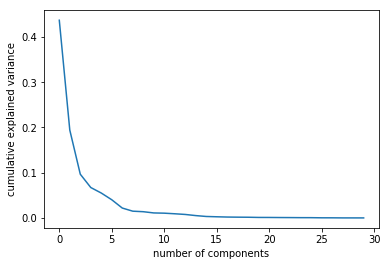

In [167]:
#Explained variance
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [168]:
pca1 = PCA(n_components=6)  
x1_train = pca.fit_transform(x1_train)  
x1_test = pca.transform(x1_test)

In [169]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(x1_train, y1_train)

# Predicting the Test set results
y_pred1 = classifier.predict(x1_test)

C:\Users\RAMASAMY\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [170]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm1 = confusion_matrix(y1_test, y_pred1)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(y1_test, y_pred1)) )

[[ 25  38]
 [107   1]]
Accuracy : 0.8947368421052632


In [173]:
lg1 = LogisticRegression(random_state=0)
lg1.fit(x1_train, y1_train)
y_pred_log1 =lg1.predict(x1_test) 

C:\Users\RAMASAMY\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [174]:

cm = confusion_matrix(y1_test, y_pred_log1)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(y1_test, y_pred_log1)) )

[[ 60   3]
 [  2 106]]
Accuracy : 0.9707602339181286


In [185]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x1_train,y1_train)
y_pred_knn1=knn.predict(x1_test)

In [187]:

cm = confusion_matrix(y1_test, y_pred_knn1)  
print(cm)  
print('Accuracy : ' + str(accuracy_score(y1_test, y_pred_knn1)) )

[[ 57   6]
 [  3 105]]
Accuracy : 0.9473684210526315
